In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [23]:
dataset=pd.read_csv('/content/Pharmaceuticals.csv')

In [24]:
dataset

,Symbol,Name,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin,Median_Recommendation,Location,Exchange
0,ABT,Abbott Laboratories,68.44,0.32,24.7,26.4,11.8,0.7,0.42,7.54,16.1,Moderate Buy,US,NYSE
1,AGN,"Allergan, Inc.",7.58,0.41,82.5,12.9,5.5,0.9,0.60,9.16,5.5,Moderate Buy,CANADA,NYSE
2,AHM,Amersham plc,6.30,0.46,20.7,14.9,7.8,0.9,0.27,7.05,11.2,Strong Buy,UK,NYSE
3,AZN,AstraZeneca PLC,67.63,0.52,21.5,27.4,15.4,0.9,0.00,15.00,18.0,Moderate Sell,UK,NYSE
4,AVE,Aventis,47.16,0.32,20.1,21.8,7.5,0.6,0.34,26.81,12.9,Moderate Buy,FRANCE,NYSE
5,BAY,Bayer AG,16.90,1.11,27.9,3.9,1.4,0.6,0.00,-3.17,2.6,Hold,GERMANY,NYSE
6,BMY,Bristol-Myers Squibb Company,51.33,0.50,13.9,34.8,15.1,0.9,0.57,2.70,20.6,Moderate Sell,US,NYSE
7,CHTT,"Chattem, Inc",0.41,0.85,26.0,24.1,4.3,0.6,3.51,6.38,7.5,Moderate Buy,US,NASDAQ
8,ELN,"Elan Corporation, plc",0.78,1.08,3.6,15.1,5.1,0.3,1.07,34.21,13.3,Moderate Sell,IRELAND,NYSE
9,LLY,Eli Lilly and Company,73.84,0.18,27.9,31.0,13.5,0.6,0.53,6.21,23.4,Hold,US,NYSE


In [25]:
dataset = dataset.drop(columns=['Name', 'Median_Recommendation', 'Location', 'Exchange'])
dataset

,Symbol,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin
0,ABT,68.44,0.32,24.7,26.4,11.8,0.7,0.42,7.54,16.1
1,AGN,7.58,0.41,82.5,12.9,5.5,0.9,0.60,9.16,5.5
2,AHM,6.30,0.46,20.7,14.9,7.8,0.9,0.27,7.05,11.2
3,AZN,67.63,0.52,21.5,27.4,15.4,0.9,0.00,15.00,18.0
4,AVE,47.16,0.32,20.1,21.8,7.5,0.6,0.34,26.81,12.9
5,BAY,16.90,1.11,27.9,3.9,1.4,0.6,0.00,-3.17,2.6
6,BMY,51.33,0.50,13.9,34.8,15.1,0.9,0.57,2.70,20.6
7,CHTT,0.41,0.85,26.0,24.1,4.3,0.6,3.51,6.38,7.5
8,ELN,0.78,1.08,3.6,15.1,5.1,0.3,1.07,34.21,13.3
9,LLY,73.84,0.18,27.9,31.0,13.5,0.6,0.53,6.21,23.4


In [26]:
dataset.set_index('Symbol', inplace=True)
dataset

,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin
Symbol,,,,,,,,,
ABT,68.44,0.32,24.7,26.4,11.8,0.7,0.42,7.54,16.1
AGN,7.58,0.41,82.5,12.9,5.5,0.9,0.60,9.16,5.5
AHM,6.30,0.46,20.7,14.9,7.8,0.9,0.27,7.05,11.2
AZN,67.63,0.52,21.5,27.4,15.4,0.9,0.00,15.00,18.0
AVE,47.16,0.32,20.1,21.8,7.5,0.6,0.34,26.81,12.9
BAY,16.90,1.11,27.9,3.9,1.4,0.6,0.00,-3.17,2.6
BMY,51.33,0.50,13.9,34.8,15.1,0.9,0.57,2.70,20.6
CHTT,0.41,0.85,26.0,24.1,4.3,0.6,3.51,6.38,7.5
ELN,0.78,1.08,3.6,15.1,5.1,0.3,1.07,34.21,13.3


In [27]:
from sklearn.metrics import pairwise

In [28]:
d=pairwise.pairwise_distances(dataset, metric='euclidean')
d=pd.DataFrame(d,columns=dataset.index)
d.index=dataset.index
d


Symbol,ABT,AGN,AHM,AZN,AVE,BAY,BMY,CHTT,ELN,LLY,GSK,IVX,JNJ,MRX,MRK,NVS,PFE,PHA,SGP,WPI,WYE
Symbol,,,,,,,,,,,,,,,,,,,,,
ABT,0.000000,85.917312,63.639310,9.185538,29.920523,59.822957,23.121691,69.111906,76.915243,10.888094,67.530031,66.908429,105.705586,73.193453,66.763236,31.977390,134.165821,38.688666,35.115217,71.027789,38.729072
AGN,85.917312,0.000000,62.186991,88.464627,76.876489,57.681984,86.380224,58.232457,83.461502,89.957867,142.833456,63.811828,176.398183,60.406150,143.748674,110.119469,205.437625,55.513006,71.065817,68.042352,93.647162
AHM,63.639310,62.186991,0.000000,63.918213,45.946291,22.475627,51.289521,13.584944,32.766910,71.098335,127.268085,10.358673,168.728623,27.469658,129.505589,91.679208,197.315603,62.133132,30.148723,23.297678,60.778118
AZN,9.185538,88.464627,63.918213,0.000000,26.086061,62.693619,23.166253,69.785040,73.753950,14.247972,65.738435,66.284617,106.683038,71.233416,66.467431,35.813810,133.771670,41.913590,34.642670,68.794387,38.479341
AVE,29.920523,76.876489,45.946291,26.086061,0.000000,48.371042,30.386614,51.891976,50.300347,37.788465,86.987166,46.428300,128.811970,48.838491,88.292099,58.660169,155.135426,40.624857,23.698688,45.559224,45.161354
BAY,59.822957,57.681984,22.475627,62.693619,48.371042,0.000000,53.695147,28.628313,50.024640,68.152431,126.394102,31.164719,160.880810,42.331739,124.676208,84.171984,191.680271,53.189389,35.087503,39.353894,66.943706
BMY,23.121691,86.380224,51.289521,23.166253,30.386614,53.695147,0.000000,56.252955,64.781162,27.203937,78.810486,53.661661,123.826053,64.395869,83.150232,49.465348,150.718366,52.050423,22.751429,61.129615,21.149340
CHTT,69.111906,58.232457,13.584944,69.785040,51.891976,28.628313,56.252955,0.000000,37.386927,76.092004,130.658674,11.401395,174.379387,30.785071,134.445187,98.408184,202.500868,65.162040,37.254721,29.228081,62.022490
ELN,76.915243,83.461502,32.766910,73.753950,50.300347,50.024640,64.781162,37.386927,0.000000,84.491569,132.886720,26.946987,177.604964,26.820710,136.509584,104.911292,203.038957,79.266869,46.324234,16.796839,72.703821


In [29]:
dfnorm = (d - d.mean())/d.std()
dfnorm

Symbol,ABT,AGN,AHM,AZN,AVE,BAY,BMY,CHTT,ELN,LLY,GSK,IVX,JNJ,MRX,MRK,NVS,PFE,PHA,SGP,WPI,WYE
Symbol,,,,,,,,,,,,,,,,,,,,,
ABT,-1.671955,-0.079221,-0.017449,-1.409766,-0.722026,-0.152941,-0.929618,0.012679,0.034345,-1.457756,-0.603874,0.021010,-0.310272,0.042302,-0.580048,-1.228509,-0.205758,-0.823811,-0.483450,0.038308,-0.759656
AGN,0.932359,-1.961947,-0.045219,1.014318,0.602734,-0.198438,0.855402,-0.192221,0.160162,0.994836,1.336128,-0.036978,1.034818,-0.200278,1.288039,1.290831,0.998989,-0.291280,0.401715,-0.017958,0.849592
AHM,0.257071,-0.599229,-1.234307,0.263772,-0.269894,-0.946594,-0.134782,-1.033098,-0.814170,0.409850,0.935126,-1.037965,0.888887,-0.825093,0.942424,0.696307,0.861698,-0.081737,-0.605733,-0.861244,-0.113560
AZN,-1.393524,-0.023401,-0.012116,-1.690629,-0.830207,-0.091938,-0.928360,0.025357,-0.026414,-1.353539,-0.650030,0.009329,-0.291673,0.005119,-0.587225,-1.104821,-0.212421,-0.721735,-0.495084,-0.003784,-0.766974
AVE,-0.765008,-0.277335,-0.355760,-0.893006,-1.566168,-0.396301,-0.724617,-0.311636,-0.477183,-0.623358,-0.102610,-0.362509,0.129381,-0.419720,-0.057640,-0.368243,0.148703,-0.762526,-0.764544,-0.441689,-0.571173
BAY,0.141390,-0.697948,-0.804547,0.226328,-0.201485,-1.424214,-0.066901,-0.749776,-0.482482,0.318473,0.912610,-0.648342,0.739564,-0.543155,0.825237,0.454271,0.766441,-0.364828,-0.484132,-0.558638,0.067109
BMY,-0.971093,-0.069077,-0.253591,-0.982284,-0.708876,-0.283161,-1.582062,-0.229502,-0.198867,-0.951670,-0.313261,-0.227054,0.034512,-0.124591,-0.182410,-0.664689,0.074039,-0.400879,-0.787867,-0.148239,-1.274790
CHTT,0.422955,-0.685886,-0.974547,0.443160,-0.102149,-0.815846,0.005275,-1.288953,-0.725374,0.564744,1.022476,-1.018438,0.996406,-0.762199,1.062285,0.913253,0.949347,0.014135,-0.430771,-0.749476,-0.077096
ELN,0.659489,-0.133036,-0.607765,0.564516,-0.147054,-0.361161,0.245923,-0.584819,-1.443938,0.825282,1.079876,-0.727325,1.057780,-0.837404,1.112379,1.122916,0.958443,0.460588,-0.207464,-0.983763,0.235896


In [30]:
d_norm = d.apply(preprocessing.scale, axis=0)
d_norm

Symbol,ABT,AGN,AHM,AZN,AVE,BAY,BMY,CHTT,ELN,LLY,GSK,IVX,JNJ,MRX,MRK,NVS,PFE,PHA,SGP,WPI,WYE
Symbol,,,,,,,,,,,,,,,,,,,,,
ABT,-1.713244,-0.081178,-0.017880,-1.444581,-0.739856,-0.156718,-0.952575,0.012992,0.035194,-1.493755,-0.618786,0.021529,-0.317934,0.043346,-0.594372,-1.258847,-0.210839,-0.844155,-0.495388,0.039254,-0.778416
AGN,0.955383,-2.010398,-0.046336,1.039367,0.617619,-0.203339,0.876526,-0.196968,0.164117,1.019403,1.369124,-0.037891,1.060373,-0.205224,1.319847,1.322708,1.023659,-0.298473,0.411636,-0.018401,0.870573
AHM,0.263419,-0.614027,-1.264788,0.270286,-0.276559,-0.969970,-0.138111,-1.058611,-0.834276,0.419971,0.958219,-1.063597,0.910838,-0.845469,0.965697,0.713503,0.882977,-0.083755,-0.620692,-0.882512,-0.116364
AZN,-1.427937,-0.023979,-0.012415,-1.732379,-0.850709,-0.094209,-0.951286,0.025983,-0.027066,-1.386965,-0.666082,0.009559,-0.298876,0.005245,-0.601727,-1.132105,-0.217666,-0.739558,-0.507311,-0.003878,-0.785914
AVE,-0.783900,-0.284184,-0.364546,-0.915059,-1.604844,-0.406088,-0.742512,-0.319332,-0.488967,-0.638752,-0.105144,-0.371462,0.132576,-0.430085,-0.059064,-0.377337,0.152375,-0.781357,-0.783424,-0.452596,-0.585278
BAY,0.144882,-0.715184,-0.824415,0.231918,-0.206460,-1.459385,-0.068553,-0.768292,-0.494397,0.326338,0.935147,-0.664353,0.757828,-0.556568,0.845616,0.465489,0.785368,-0.373838,-0.496088,-0.572434,0.068766
BMY,-0.995075,-0.070783,-0.259854,-1.006541,-0.726382,-0.290154,-1.621131,-0.235170,-0.203778,-0.975171,-0.320997,-0.232661,0.035364,-0.127668,-0.186914,-0.681103,0.075867,-0.410779,-0.807324,-0.151900,-1.306271
CHTT,0.433400,-0.702824,-0.998613,0.454104,-0.104672,-0.835993,0.005405,-1.320783,-0.743288,0.578690,1.047726,-1.043589,1.021012,-0.781022,1.088518,0.935806,0.972791,0.014485,-0.441409,-0.767984,-0.079000
ELN,0.675775,-0.136321,-0.622774,0.578456,-0.150685,-0.370080,0.251996,-0.599261,-1.479596,0.845662,1.106543,-0.745286,1.083902,-0.858084,1.139849,1.150647,0.982112,0.471962,-0.212588,-1.008057,0.241721


Text(0.5, 0, 'Ward linkage')

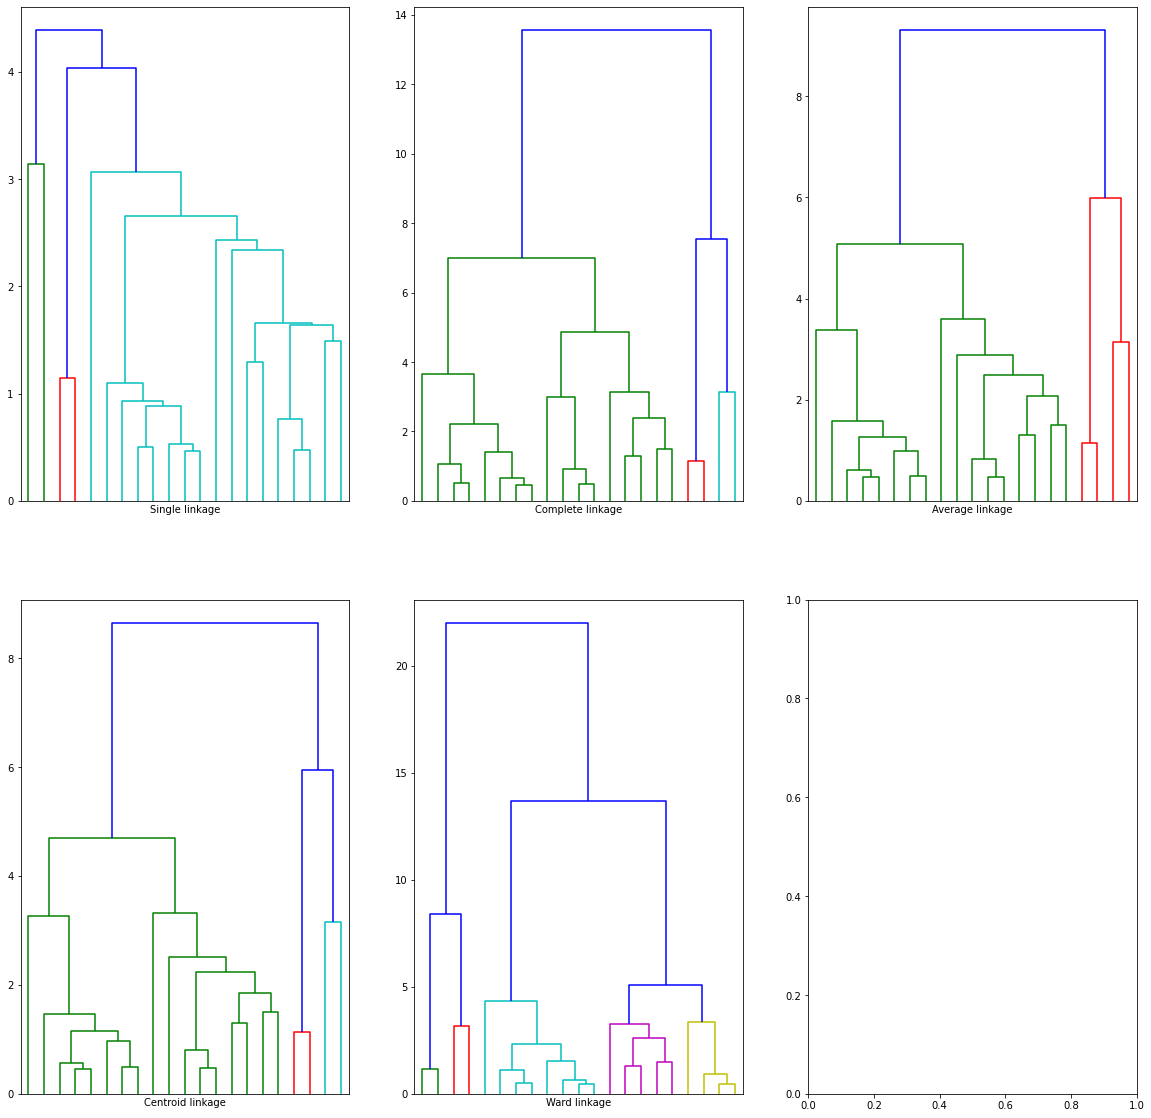

In [32]:
# Hierarchical clustering using complete linkage and Euclidean distance 

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 20), squeeze=False)
ax = axes[0, 0]
Z = linkage(dfnorm, method='single' , metric='euclidean')
dendrogram(Z, color_threshold=3.5, ax=ax, no_labels=True)
ax.set_xlabel('Single linkage')
ax = axes[0, 1]
Z = linkage(dfnorm, method='complete' , metric='euclidean')
dendrogram(Z, color_threshold=7, ax=ax, no_labels=True)
ax.set_xlabel('Complete linkage')
ax = axes[0, 2]
Z = linkage(dfnorm, method='average' , metric='euclidean')
dendrogram(Z, color_threshold=7, ax=ax, no_labels=True)
ax.set_xlabel('Average linkage')
ax = axes[1, 0]
Z = linkage(dfnorm, method='centroid' , metric='euclidean')
dendrogram(Z, color_threshold=5, ax=ax, no_labels=True)
ax.set_xlabel('Centroid linkage')
ax = axes[1, 1]
Z = linkage(dfnorm, method='ward' , metric='euclidean')
dendrogram(Z, color_threshold=5, ax=ax, no_labels=True)
ax.set_xlabel('Ward linkage')


In [ ]:
'''from sklearn.preprocessing import normalize
data_scaled = normalize(dataset)
data_scaled=pd.DataFrame(data_scaled,columns=dataset.columns)
data_scaled'''

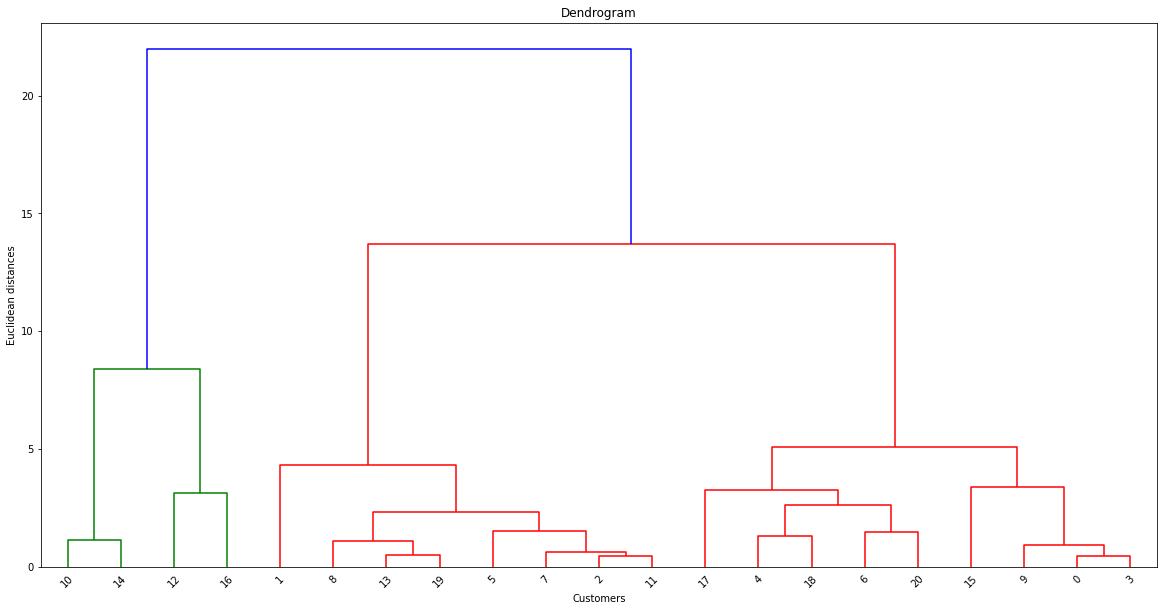

In [33]:
import scipy.cluster.hierarchy as sch
Z=sch.linkage(dfnorm, method = 'ward')
plt.figure(figsize=(20,10))
dendrogram = sch.dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances');


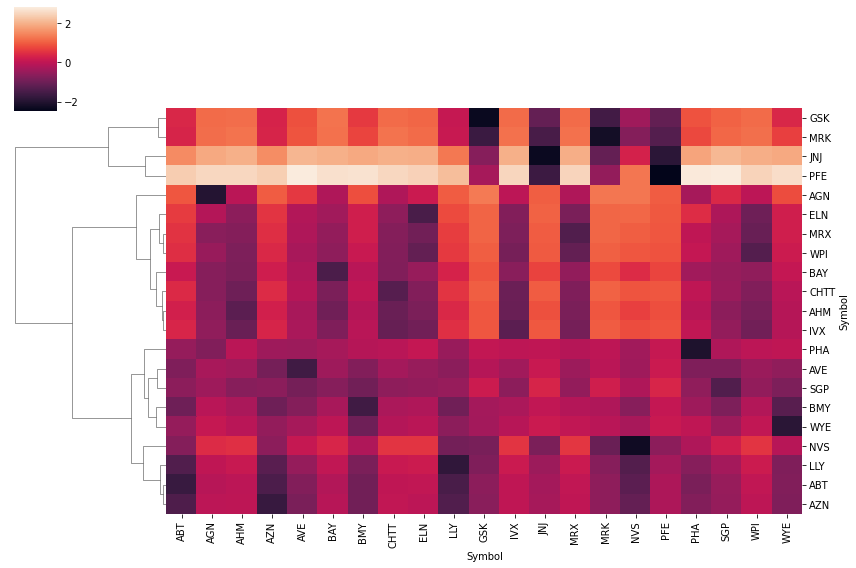

In [34]:
sns.clustermap(dfnorm,col_cluster=False,figsize=(12,8),method='ward', metric='euclidean')

In [11]:
from scipy.cluster.hierarchy import fcluster
k=3
Z = linkage(dfnorm, method='ward' , metric='euclidean')

clusters =fcluster(Z, k, criterion='maxclust')
clusters= pd.Series(clusters, index=dfnorm.index)
for key, item in clusters.groupby(clusters):
  print(key, ': ', ', '.join(item.index))

1 :  GSK, JNJ, MRK, PFE
2 :  AGN, AHM, BAY, CHTT, ELN, IVX, MRX, WPI
3 :  ABT, AZN, AVE, BMY, LLY, NVS, PHA, SGP, WYE


In [12]:
from scipy.cluster.hierarchy import fcluster
clusters =fcluster(Z, t=2, criterion='distance')
clusters= pd.Series(clusters, index=dfnorm.index)
for key, item in clusters.groupby(clusters):
  print(key, ': ', ', '.join(item.index))

1 :  GSK, MRK
2 :  JNJ
3 :  PFE
4 :  ELN, MRX, WPI
5 :  AHM, BAY, CHTT, IVX
6 :  AGN
7 :  AVE, SGP
8 :  BMY, WYE
9 :  PHA
10 :  ABT, AZN, LLY
11 :  NVS


K-Means Clustering

In [13]:
from sklearn.cluster import KMeans

In [14]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(dfnorm)
#kmeans.labels_

clusters= pd.Series(kmeans.labels_, index=dfnorm.index)
for key, item in clusters.groupby(clusters):
  print(key, ': ', ', '.join(item.index))
# Compare the cluster membership between k-means and hierarchical clustering
#pd.crosstab(np.arange(len(dfnorm)), kmeans.labels_)

0 :  JNJ, PFE
1 :  AGN, AHM, BAY, CHTT, ELN, IVX, MRX, WPI
2 :  ABT, AZN, AVE, BMY, LLY, NVS, PHA, SGP, WYE
3 :  GSK, MRK


In [15]:
k=pd.DataFrame(kmeans.cluster_centers_)
k

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,1.963519,2.221681,2.265289,1.985514,2.439309,2.321850,2.291464,2.260069,2.213981,1.748625,-0.487333,2.249103,-1.980191,2.230744,-0.819419,0.803991,-2.170367,2.310709,2.449604,2.219194,2.267275
1,0.474642,-0.718855,-0.775063,0.468567,-0.105407,-0.702595,0.151876,-0.796341,-0.785174,0.615447,1.044234,-0.794820,0.957718,-0.815578,1.046418,0.911079,0.910403,-0.017515,-0.313666,-0.809202,0.159599
2,-0.938993,-0.116507,-0.085697,-0.931190,-0.649795,-0.167767,-0.800443,-0.062710,-0.048488,-0.960908,-0.375105,-0.059697,-0.126746,-0.038947,-0.330728,-0.866202,-0.056076,-0.687742,-0.509241,-0.039123,-0.765783
3,0.363384,1.178023,1.220599,0.330574,0.906393,1.243481,0.703029,1.207488,1.144912,0.113672,-2.001630,1.198817,-1.280324,1.206826,-1.877976,-0.550399,-1.218907,0.854187,1.096643,1.193666,0.540353
